# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [37]:
#Import al# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as snsl 



# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [38]:
pima_df = pd.read_csv("C:/Users/Abhishek/Downloads/pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [39]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [40]:
print(pima_df.dtypes)
print(pima_df.shape)


Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [47]:
pima_df.median()
pima_df.eq(0).any()
#to check for 0s 

Preg      True
Plas      True
Pres      True
skin      True
test      True
mass      True
pedi     False
age      False
class     True
dtype: bool

In [52]:
# to check Plas, test , mass

pima_df.Plas.replace(0,pima_df.Plas.median(),inplace = True)
pima_df.test.replace(0,pima_df.test.median(),inplace = True)
pima_df.mass.replace(0,pima_df.mass.median() ,inplace = True)
pima_df.skin.replace(0,pima_df.skin.median() ,inplace =True)


# Q5 Print the descriptive statistics of each & every column using describe() function

In [50]:
pima_df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

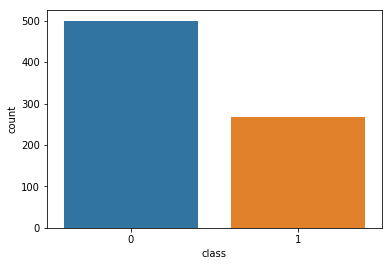

In [53]:
import seaborn as sns

sns.countplot(x='class', data=pima_df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


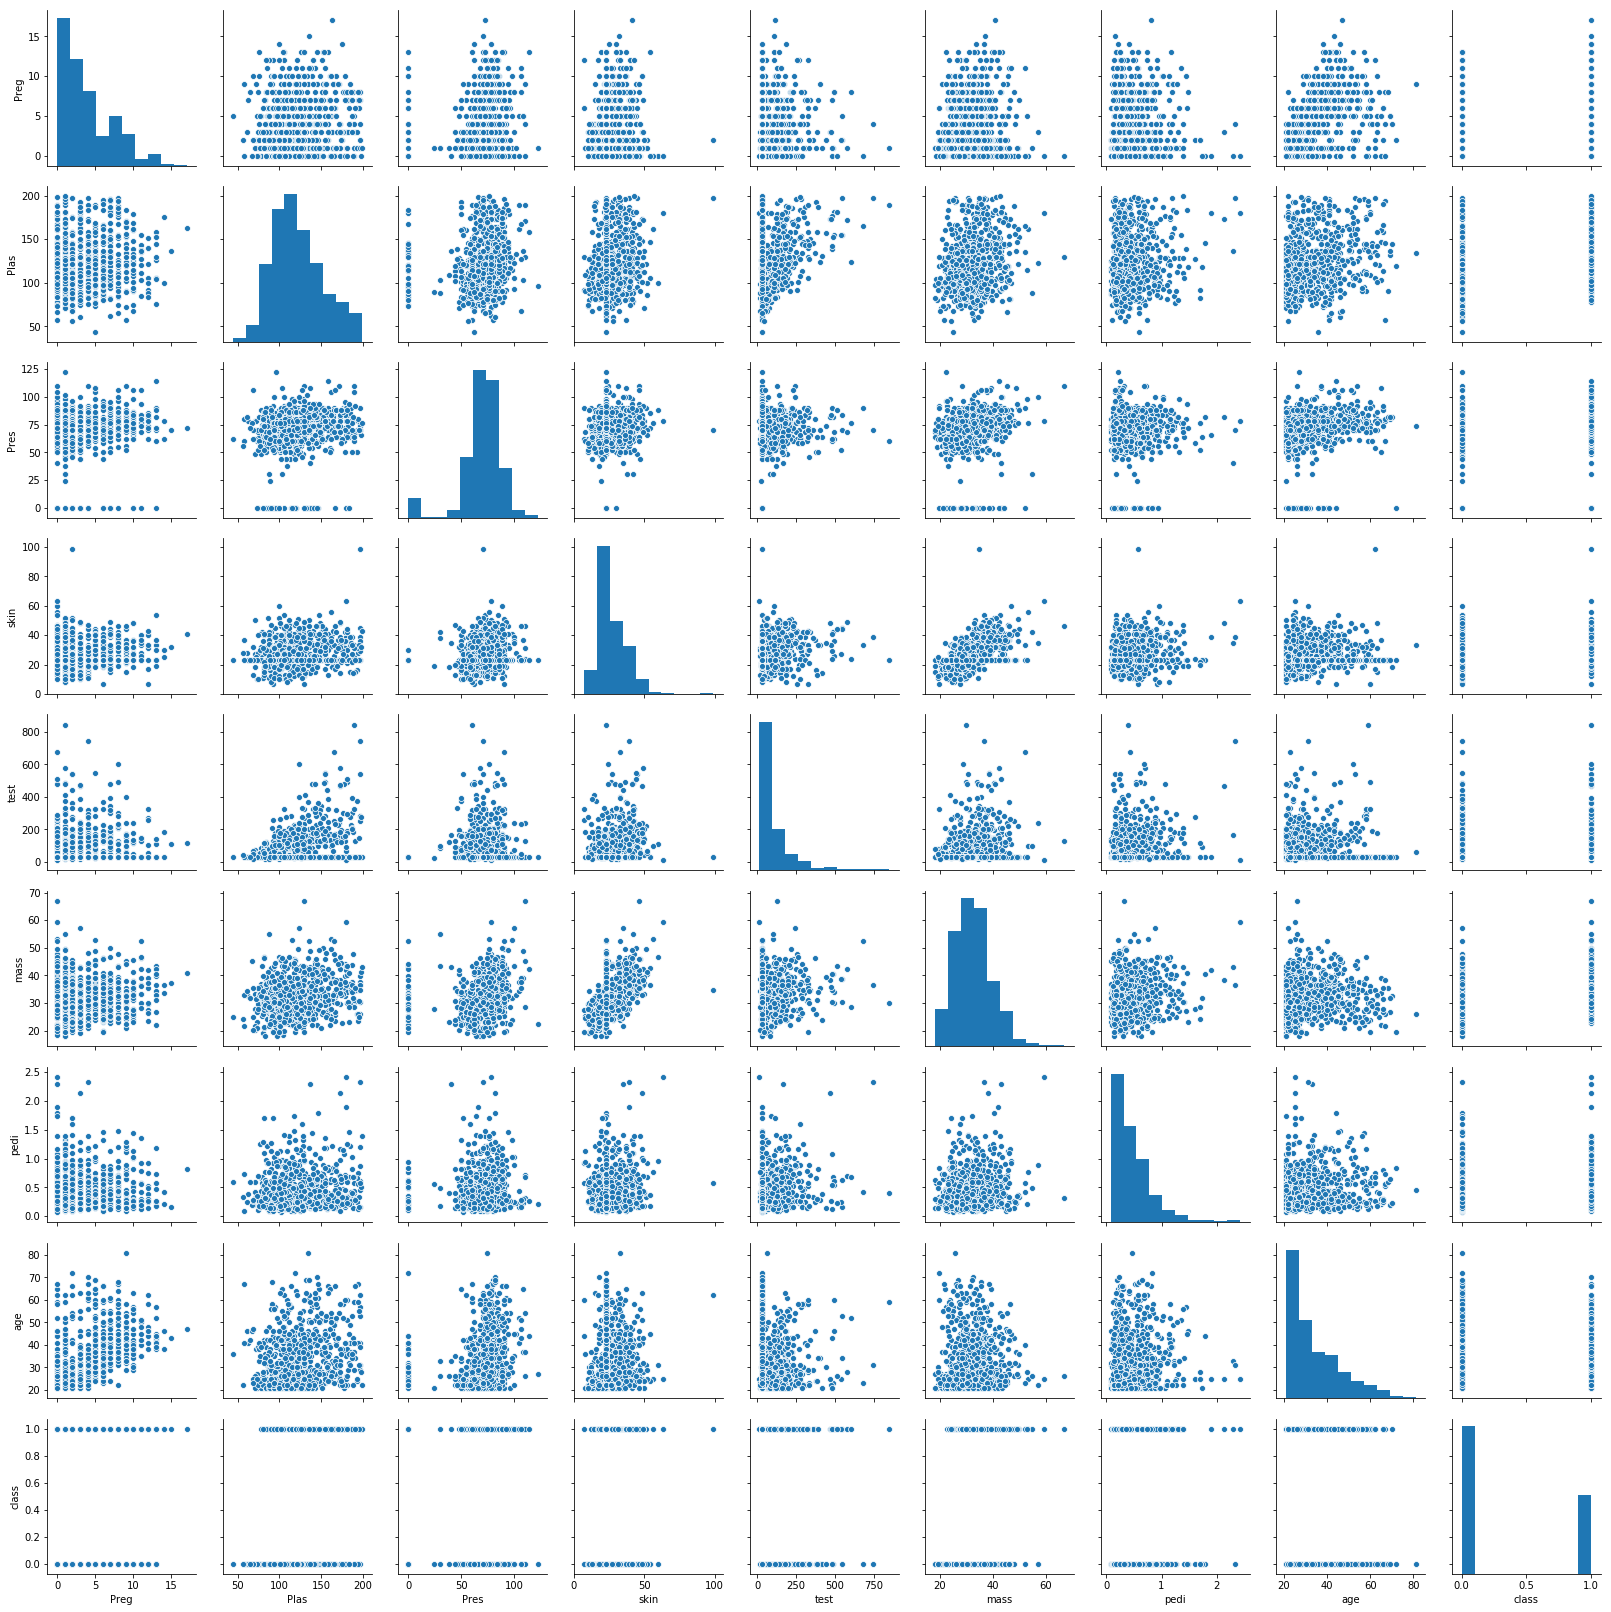

In [54]:
sns.pairplot(pima_df)

Using the plot - infer the relationship between different variables

In [75]:
pima_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.141282,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.158332,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.141282,0.158332,1.000000,0.168421,0.085221,0.184220,0.041265,0.239528,0.065068
skin,0.032568,0.172143,0.168421,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,0.085221,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.184220,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,0.041265,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.239528,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.065068,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [56]:
from sklearn.model_selection import train_test_split


In [57]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = pima_df.drop('class', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = pima_df[['class']]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [59]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [63]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [68]:
y_predict = dt_model.predict(X_test)
prediction= dt_model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, prediction)

1.0

In [72]:
print(dt_model.score(X_test , y_test))

0.7142857142857143


In [70]:
print(metrics.confusion_matrix(y_test, y_predict))

[[112  34]
 [ 32  53]]


Print the feature importance of the decision model - Optional

In [73]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
Preg  0.087504
Plas  0.246451
Pres  0.129236
skin  0.029030
test  0.013832
mass  0.256429
pedi  0.113041
age   0.124477
